<a href="https://colab.research.google.com/github/umjiwoo/ubion/blob/main/EdaPreprocessing_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터 불러오기

In [3]:
df_origin = pd.read_csv("/content/drive/MyDrive/ubion/application_data.csv")
df_origin.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 원본 복구를 위해 copy()해놓음
# df로 작업하고 원본과 비교 필요 시 df_origin으로 확인

df = df_origin.copy()

# print(df.shape)
df.shape

(307511, 122)

In [5]:
df.info(verbose=True, null_counts=True)

<ipython-input-5-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [7]:
264366/307511

0.8596960759127316

In [8]:
df['AMT_REQ_CREDIT_BUREAU_HOUR']

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 307511, dtype: float64

In [9]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [10]:
# 결측치 확인
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### 사용하지 않는 컬럼 제거

In [11]:
# 컬럼명 지정해서 삭제하기 전(column index 순서 바뀌기 전) column index로 뭉텅이 삭제

# EXT_SOURCE 1~3 -> 의미파악불가
col_drop1 = df_origin.columns[41:44]
df.drop(col_drop1, axis=1, inplace=True)
print(df.columns)

# 주거 관련 columns  -> 의미파악불가 
col_drop2 = df_origin.columns[44:95]
df.drop(col_drop2, axis=1, inplace=True)

# FLAG_DOCUMENT_2~21 -> 의미파악 불가 
col_drop3 = df_origin.columns[96:116]
df.drop(col_drop3, axis=1, inplace=True)


print(df.shape)
df.head()


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=119)
(307511, 48)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.drop(['SK_ID_CURR', 
         'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE',
         'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
         'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
         'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY' ], axis=1, inplace=True)

In [13]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### DAYAS_EMPLOYED 가 양수인 데이터 의미 찾기

In [14]:
# DAYS_EMPLOYED(근속일수) 데이터 양수인 데이터 개수
len(df.loc[df['DAYS_EMPLOYED'] > 0])

55374

In [15]:
# ORGANIZATION_TYPE 데이터 유형 중 XNA인 데이터 발견, 그 수가 DAYS_EMPLOYED(근속일수) 데이터 양수인 데이터 개수와 동일

df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

-> DAYS_EMPLOYED(근속일수) 데이터 양수이고 ORGANIZATION_TYPE(근무지 유형) 데이터가 "XNA"인 데이터를 무직인 것으로 판단

### OCCUPATION_TYPE 결측치 대체  

> DAYS_EMPLOYED 가 양수이고 ORGANIZATION_TYPE 이 XNA인 데이터 : 무직


> 그 외의 결측치 : 미응답자(근무지 유형만 답변하고 직무는 답변하지 않음)

In [16]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
# OCCUPATION_TYPE(직무 유형) 데이터 결측치 개수
len(df.loc[df["OCCUPATION_TYPE"].isna()]) #96391/307511*100 = 31%

96391

In [18]:
# DAYS_EMPLOYED 가 양수인 OCCUPATION_TYPE 데이터 개수
len(df.loc[df['DAYS_EMPLOYED'] > 0,'OCCUPATION_TYPE'])

55374

In [19]:
# DAYS_EMPLOYED 가 양수이면서 ORGANIZATION_TYPE 이 XNA인 OCCUPATION_TYPE 데이터 개수
len(df.loc[(df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == "XNA"),'OCCUPATION_TYPE'])

55374

#### 무직(DAYS_EMPLOYED 가 양수이면서 ORGANIZATION_TYPE 이 XNA)인 OCCUPATION_TYPE 데이터 채우기 위해 재확인

In [20]:
# DAYS_EMPLOYED 가 양수인 데이터에 대한 OCCUPATION_TYPE 데이터 유형 확인
df.loc[df['DAYS_EMPLOYED'] > 0,'OCCUPATION_TYPE'].unique()

array([nan, 'Cleaning staff'], dtype=object)

In [21]:
# DAYS_EMPLOYED 가 양수인 데이터에 대한 OCCUPATION_TYPE 데이터가 Cleaning staff인 개수 확인
len(df.loc[(df['DAYS_EMPLOYED'] > 0 )& (df['OCCUPATION_TYPE']=="Cleaning staff")])

2

-> DAYS_EMPLOYED 가 양수인 데이터에 대한 OCCUPATION_TYPE 데이터 유형과 그 개수 파악

-> OCCUPATION_TYPE 이 nan으로만 구성되어 있을 것이라고 예상했지만 Cleaning staff 데이터가 2개 존재 -> 이상치라고 판단 (4653개 중에 2개라)

### 결측치 제거

In [22]:
df.drop((df.loc[(df['DAYS_EMPLOYED'] > 0)&(df['OCCUPATION_TYPE']=='Cleaning staff')].index),axis=0,inplace=True)

## df.drop((df.loc[(df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == "XNA")& (df['OCCUPATION_TYPE']=="Cleaning staff")])

#   df['OCCUPATION_TYPE'] 결측치에서 df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == 'XNA') 인 사람들 'Unemployed' 로 바꿀건데
#   df['DAYS_EMPLOYED'] > 0 인 사람들이랑 df['ORGANIZATION_TYPE'] == 'XNA' 사람들 같은 사람들이라서 바꿀 때 하나만 조건으로 해도 됨

In [23]:
# 이상치 삭제 잘 됐는지 확인
len(df.loc[(df['DAYS_EMPLOYED'] > 0 )& (df['OCCUPATION_TYPE']=="Cleaning staff")])

0

In [24]:
len(df.loc[df['DAYS_EMPLOYED'] > 0 ])

55372

In [25]:
len(df.loc[df['ORGANIZATION_TYPE'] == "XNA"])

55372

In [26]:
# 결측치 0으로 대체
df['OCCUPATION_TYPE'].fillna(0,inplace=True)

In [27]:
# DAYS_EMPLOYED 가 양수이면서 OCCUPATION_TYPE 이 nan이었던 데이터에 대해 Unemployed로 대체
df.loc[(df['DAYS_EMPLOYED'] > 0)&(df['OCCUPATION_TYPE']==0),'OCCUPATION_TYPE']='Unemployed'

In [28]:
# OCCUPATION_TYPE 이 nan이었던 그 외 데이터 Unknown으로 대체
df['OCCUPATION_TYPE'].replace(0,'Unknown',inplace=True)

In [29]:
df['OCCUPATION_TYPE'].value_counts()

Unemployed               55372
Laborers                 55186
Unknown                  41019
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4651
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

### df['OCCUPATION_TYPE']의 unknown값(41019개) 사실상 결측치임. 어떻게 할 지 고민하고 나서 인코딩 필요**



> ### 기존 방법) 데이터 분포 변화됨
> #### OCCUPATION_TYPE에 응답하지 않은 사람(Unknown)들 모두 ORGANIZATION_TYPE은 데이터 있음
> #### Unknown인 사람들의 ORGANIZATION_TYPE(근무지 유형)이면서 
> #### OCCUPATION_TYPE도 응답한 사람들의 데이터를 통해 
> #### 동일한 ORGANIZATION_TYPE 중 OCCUPATION_TYPE의 최빈값으로 사실상 결측치인 Unknown인 대체

> ### 새로운 방법) Unnknown 삭제



In [30]:
# # OCCUPATION_TYPE 인 Unknown이 아닌 데이터를 추출
# df_occu = df.loc[~(df["OCCUPATION_TYPE"]=="Unknown")]

# # ORGANIZATION_TYPE 으로 그룹화한 후 describe로 그룹바이한 결과의 각종 값 얻음
# occu_group = df_occu.groupby(["ORGANIZATION_TYPE","OCCUPATION_TYPE"])[["OCCUPATION_TYPE"]].describe()

# # 그 값들 중 count(동일한 ORGANIZATION_TYPE 내 각 OCCUPATION_TYPE 데이터 개수), top(그 OCCUPATION_TYPE 이름)
# occu_group = occu_group["OCCUPATION_TYPE"][["count","top"]]


# # OCCUPATION_TYPE 인 Unknown 데이터의 ORGANIZATION_TYPE 카테고리 추출
# df_occu_unknown_orga = df.loc[df["OCCUPATION_TYPE"]=="Unknown"]["ORGANIZATION_TYPE"]

# # 리스트로 받으면 밑에 반복문에서 중복으로 삽입되므로 집합으로 저장
# orga_occu = set()

# # 각 ORGANIZATION_TYPE에서 count가 최대인 OCCUPATION_TYPE의 이름만 뽑아서
# # orga_occu 집합에 넣음
# for orga in df_occu_unknown_orga.values:
#   m_freq_occu = occu_group.loc[occu_group["count"]==occu_group.loc[orga]["count"].max()]["top"].values[0]
#   orga_occu.add((orga,m_freq_occu))

# # 집합은 인덱스로 접근 불가하므로 리스트로 바꿔줌
# orga_occu_list = list(orga_occu)

# # 각 ORGANIZATION_TYPE 에 OCCUPATION_TYPE 이 Unknown인 데이터 행을 찾아 OCCUPATION_TYPE 컬럼값 아까 얻은 최빈값으로 대체
# for or_oc in orga_occu_list:
#   df.loc[(df["ORGANIZATION_TYPE"]==or_oc[0]) & (df["OCCUPATION_TYPE"]=="Unknown"), "OCCUPATION_TYPE"]=or_oc[1]

결측치 제거 수행 완료  
데이터 생성 시점으로부터 과거 일자를 계산한 값으로 음수값이었던 DAYS_EMPLOYED 데이터 양수로 바꿔줌과 동시에 무직인 사람 데이터는 그 값을 0으로 바꿔주고 기존 근속일수가 존재했던 사람에 대해서는 +1 수행(무직인 사람과 구별하기 위해)

In [31]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED'] <= 0, -(df['DAYS_EMPLOYED'])+1, 0)

In [32]:
len(df.loc[df["CODE_GENDER"]=="XNA"])

4

In [33]:
# CODE_GENDER XNA데이터(4개) 삭제
df.drop(df.loc[df["CODE_GENDER"]=="XNA"].index, axis=0, inplace=True)

In [34]:
df.loc[df["CODE_GENDER"]=="XNA"]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [35]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [36]:
# DAYS_LAST_PHONE_CHANGE 결측치(1개) 삭제
df.drop(df.loc[df["DAYS_LAST_PHONE_CHANGE"].isna()].index, axis=0, inplace=True)

In [37]:
df.loc[df["DAYS_LAST_PHONE_CHANGE"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [38]:
df["DAYS_LAST_PHONE_CHANGE"].head(3)

0   -1134.0
1    -828.0
2    -815.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [39]:
# DAYS_LAST_PHONE_CHANGE 양수 및 년단위 변환
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x:(-x)/365)
df["DAYS_LAST_PHONE_CHANGE"].head(3)

0    3.106849
1    2.268493
2    2.232877
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [40]:
df["DAYS_REGISTRATION"].head(3)

0   -3648.0
1   -1186.0
2   -4260.0
Name: DAYS_REGISTRATION, dtype: float64

In [41]:
df.loc[(-df["DAYS_REGISTRATION"] > -df["DAYS_BIRTH"]),['DAYS_REGISTRATION','DAYS_BIRTH']]

,DAYS_REGISTRATION,DAYS_BIRTH
266366,-10116.041667,-10116


In [42]:
# 나이(DAYS_BIRTH)보다 거주일수(DAYS_REGISTRATION)가 많은 경우 삭제
df.drop(df.loc[(-df["DAYS_REGISTRATION"] > -df["DAYS_BIRTH"])].index, axis=0, inplace=True)
df.loc[(-df["DAYS_REGISTRATION"] > -df["DAYS_BIRTH"])]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [43]:
# DAYS_REGISTRATION 양수 및 년단위 변환
df["DAYS_REGISTRATION"] = df["DAYS_REGISTRATION"].apply(lambda x:(-x)/365)
df["DAYS_REGISTRATION"].head(3)

0     9.994521
1     3.249315
2    11.671233
Name: DAYS_REGISTRATION, dtype: float64

In [44]:
df["DAYS_BIRTH"].head(3)

0    -9461
1   -16765
2   -19046
Name: DAYS_BIRTH, dtype: int64

In [45]:
# DAYS_BIRTH 양수 및 년단위 변환
df["DAYS_BIRTH"] = df["DAYS_BIRTH"].apply(lambda x:(-x)/365)
df["DAYS_BIRTH"].head(3)

0    25.920548
1    45.931507
2    52.180822
Name: DAYS_BIRTH, dtype: float64

In [46]:
df["DAYS_ID_PUBLISH"].head(3)

0   -2120
1    -291
2   -2531
Name: DAYS_ID_PUBLISH, dtype: int64

In [47]:
# DAYS_ID_PUBLISH 양수 및 년단위 변환
df["DAYS_ID_PUBLISH"] = df["DAYS_ID_PUBLISH"].apply(lambda x:(-x)/365)
df["DAYS_ID_PUBLISH"].head(3)

0    5.808219
1    0.797260
2    6.934247
Name: DAYS_ID_PUBLISH, dtype: float64

In [48]:
df["DAYS_ID_PUBLISH"].value_counts()

11.104110    169
11.219178    162
11.084932    161
12.101370    159
11.660274    158
            ... 
16.153425      1
16.221918      1
15.761644      1
16.328767      1
17.016438      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [49]:
df["DAYS_ID_PUBLISH_int"] = df["DAYS_ID_PUBLISH"].apply(lambda x:int(x)) # 정수로 바꿔 신분증발급연차
df["DAYS_BIRTH_int"] = df["DAYS_BIRTH"].apply(lambda x:int(x)) # 나이를 정수로
df.groupby(["DAYS_ID_PUBLISH_int",'DAYS_BIRTH_int'])['DAYS_BIRTH_int'].count() # 신분증발급연차 별 나이

df["DAYS_REGISTRATION_int"] = df["DAYS_REGISTRATION"].apply(lambda x:int(x))

In [50]:
pd.crosstab(df.DAYS_ID_PUBLISH_int, df.DAYS_BIRTH_int, margins=True).style.background_gradient(cmap='summer_r')
# 20대가 초기 발급인 것 같고 40대 후반에서 50대 초반이 재발급인 것 같은데 20대보다 40&50대가 많은 걸 알 수 있음

DAYS_BIRTH_int,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,All
DAYS_ID_PUBLISH_int,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,224,181,207,176,184,193,386,351,288,294,305,243,258,267,240,218,219,216,204,192,195,175,128,101,6973,1067,125,93,65,75,78,95,86,76,71,71,69,65,81,81,62,60,47,43,23,23,23,9,0,14907
1,0,1028,491,238,180,210,195,443,419,331,344,344,335,283,266,278,281,250,253,204,185,173,159,180,126,3,6208,1036,130,86,79,82,76,96,92,100,108,82,62,67,68,59,54,50,41,21,12,15,5,0,15828
2,0,1,2261,900,305,262,281,506,434,391,395,368,338,271,251,248,276,249,260,241,196,185,173,151,151,2,0,5846,1064,135,89,86,111,96,78,81,105,94,78,67,62,58,52,59,44,28,28,22,7,0,17386
3,0,0,0,2711,801,289,264,524,491,383,344,333,339,277,255,264,234,251,254,215,209,208,152,141,120,8,0,0,5693,1024,151,101,90,104,95,69,84,85,92,77,58,52,55,54,53,24,8,21,6,0,17063
4,0,0,0,0,2443,767,304,516,446,458,386,367,346,296,302,279,268,277,243,190,227,196,172,181,132,8,0,0,0,5315,1094,164,136,120,125,118,101,82,86,122,57,48,50,42,44,27,15,24,11,0,16585
5,0,1,0,0,0,2456,915,736,506,440,455,413,396,371,308,341,291,298,273,281,251,235,217,175,190,4,1,0,0,0,4994,1085,203,183,177,176,137,110,90,101,93,70,43,48,49,30,23,18,7,0,17191
6,0,0,0,0,0,0,2407,1619,711,543,587,524,433,354,337,342,333,310,287,266,257,249,217,212,183,4,1,0,0,0,0,5093,1294,312,261,275,213,179,98,102,85,81,72,70,48,33,22,12,5,0,18431
7,0,0,0,0,0,0,0,3745,1573,702,618,578,474,380,334,304,367,318,281,253,251,226,226,226,210,6,0,0,0,0,0,0,4758,1533,394,338,250,175,131,110,99,89,88,55,45,31,29,27,12,0,19236
8,0,0,0,0,0,0,0,0,3044,1503,804,718,556,471,358,319,295,281,274,267,249,223,249,212,186,4,0,0,0,0,0,0,0,4927,1765,712,337,199,111,102,82,88,69,96,77,30,18,22,8,0,18656


In [51]:
df.loc[df["DAYS_ID_PUBLISH_int"] ==0]["DAYS_BIRTH_int"].value_counts()

45    6973
46    1067
27     386
28     351
31     305
30     294
29     288
34     267
33     258
32     243
35     240
21     224
37     219
36     218
38     216
23     207
39     204
41     195
26     193
40     192
25     184
22     181
24     176
42     175
43     128
47     125
44     101
52      95
48      93
53      86
59      81
60      81
51      78
54      76
50      75
56      71
55      71
57      69
49      65
58      65
61      62
62      60
63      47
64      43
65      23
67      23
66      23
68       9
20       1
Name: DAYS_BIRTH_int, dtype: int64

In [52]:
len(df.loc[df["AMT_ANNUITY"].isna()])

12

In [53]:
# AMT_ANNUITY 결측치(12개) 삭제
df.drop(df.loc[df["AMT_ANNUITY"].isna()].index, axis=0, inplace=True)
df.loc[df["AMT_ANNUITY"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int


In [54]:
len(df.loc[df["AMT_GOODS_PRICE"].isna()])

276

In [55]:
# AMT_GOODS_PRICE 결측치(276개) 삭제
df.drop(df.loc[df["AMT_GOODS_PRICE"].isna()].index, axis=0, inplace=True)
df.loc[df["AMT_GOODS_PRICE"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int


In [56]:
df["NAME_FAMILY_STATUS"].value_counts()

Married                 196253
Single / not married     45383
Civil marriage           29748
Separated                19757
Widow                    16074
Name: NAME_FAMILY_STATUS, dtype: int64

In [57]:
df_origin["NAME_FAMILY_STATUS"].value_counts() 

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

df_origin의 "NAME_FAMILY_STATUS" 에 unknown이 2개 있었는데 위에서부터 drop을 하면서 2개가 사라짐 => 따라서 unknown에 대해 drop 필요 x

In [58]:
len(df.loc[df["CNT_FAM_MEMBERS"].isna()])

0

In [59]:
len(df_origin.loc[df_origin["CNT_FAM_MEMBERS"].isna()])

2

df_origin의 "CNT_FAM_MEMBERS" 에 결측치 2개 있었는데 위에서부터 drop을 하면서 2개가 사라짐 => 따라서 결측치 처리 필요 x

In [60]:
df['AMT_INCOME_TOTAL'].head(3)

0    202500.0
1    270000.0
2     67500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [61]:
df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"].apply(lambda x:int(x*16.08))
df["AMT_INCOME_TOTAL"]

0         3256199
1         4341600
2         1085400
3         2170800
4         1953719
           ...   
307506    2532599
307507    1157759
307508    2460239
307509    2749679
307510    2532599
Name: AMT_INCOME_TOTAL, Length: 307215, dtype: int64

In [62]:
# len(df.loc[df["OWN_CAR_AGE"].isna()]) #202640

In [63]:
# len(df.loc[df["OWN_CAR_AGE"]>70,"OWN_CAR_AGE"]) #2

In [64]:
# len(df.loc[(df["OWN_CAR_AGE"]>60) & (df["OWN_CAR_AGE"]<= 70),"OWN_CAR_AGE"]) #3337

In [65]:
# len(df.loc[df["OWN_CAR_AGE"] == 60,"OWN_CAR_AGE"]) #0

In [66]:
# len(df.loc[(df["OWN_CAR_AGE"]>50) & (df["OWN_CAR_AGE"]<= 60),"OWN_CAR_AGE"]) #22

In [67]:
# len(df.loc[(df["OWN_CAR_AGE"]>40) & (df["OWN_CAR_AGE"]<= 50),"OWN_CAR_AGE"]) #165

<Axes: >

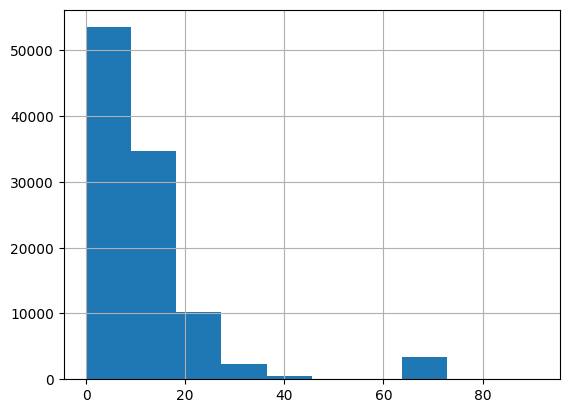

In [68]:
df['OWN_CAR_AGE'].hist()

In [69]:
# OWN_CAR_AGE이 60 이상인 값 삭제
df.drop(df.loc[df["OWN_CAR_AGE"]>= 60].index, axis=0, inplace=True)

In [70]:
df.loc[df["OWN_CAR_AGE"]>= 60]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int


In [71]:
df['OWN_CAR_AGE'].head()

0     NaN
1     NaN
2    26.0
3     NaN
4     NaN
Name: OWN_CAR_AGE, dtype: float64

In [72]:
# 결측치 -> '차 없음' 으로 판단해서 결측치 외 모든 값+1/ 결측치는 0으로 대체
#df.loc[df["OWN_CAR_AGE"]== 0] #2134개
df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"].apply(lambda x:x+1)
df["OWN_CAR_AGE"].head() #NaN 값 그대로

0     NaN
1     NaN
2    27.0
3     NaN
4     NaN
Name: OWN_CAR_AGE, dtype: float64

In [73]:
# len(df.loc[df["OWN_CAR_AGE"].isna()]) # 개수 그대로 202640

In [74]:
df["OWN_CAR_AGE"].fillna(0, inplace=True)
df["OWN_CAR_AGE"]

0          0.0
1          0.0
2         27.0
3          0.0
4          0.0
          ... 
307506     0.0
307507     0.0
307508     0.0
307509     0.0
307510     0.0
Name: OWN_CAR_AGE, Length: 303876, dtype: float64

In [75]:
# 정수로 바꾸기
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].astype(int)
df["OWN_CAR_AGE"]

0          0
1          0
2         27
3          0
4          0
          ..
307506     0
307507     0
307508     0
307509     0
307510     0
Name: OWN_CAR_AGE, Length: 303876, dtype: int64

<Axes: >

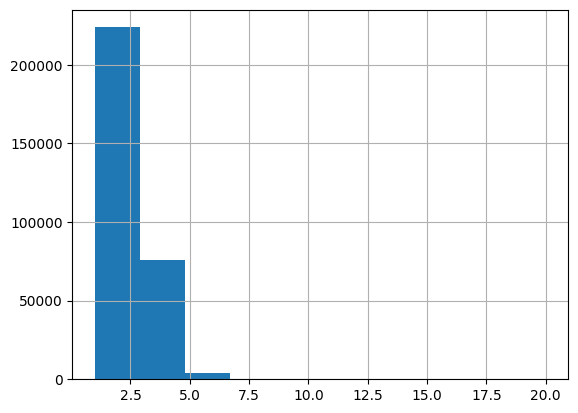

In [76]:
df["CNT_FAM_MEMBERS"].hist()

In [77]:
#df.info()

In [78]:
df["CNT_FAM_MEMBERS"].value_counts() # 6이상은 524/303876 #0.1%

2.0     156918
1.0      66890
3.0      51786
4.0      24337
5.0       3421
6.0        403
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [79]:
# 6이상인 값 5로 대체
df['CNT_FAM_MEMBERS'] = np.where(df['CNT_FAM_MEMBERS'] >= 6, 5, df['CNT_FAM_MEMBERS'])
df["CNT_FAM_MEMBERS"].value_counts()

2.0    156918
1.0     66890
3.0     51786
4.0     24337
5.0      3945
Name: CNT_FAM_MEMBERS, dtype: int64

## 파생변수 생성

In [80]:
df['DAYS_BIRTH_int_n0s']=""
df.loc[(df['DAYS_BIRTH_int']>=20) & (df['DAYS_BIRTH_int'] <30),"DAYS_BIRTH_int_n0s"]="20s"
df.loc[(df['DAYS_BIRTH_int']>=30) & (df['DAYS_BIRTH_int'] <40),"DAYS_BIRTH_int_n0s"]="30s"
df.loc[(df['DAYS_BIRTH_int']>=40) & (df['DAYS_BIRTH_int'] <50),"DAYS_BIRTH_int_n0s"]="40s"
df.loc[(df['DAYS_BIRTH_int']>=50) & (df['DAYS_BIRTH_int'] <60),"DAYS_BIRTH_int_n0s"]="50s"
df.loc[(df['DAYS_BIRTH_int']>=60),"DAYS_BIRTH_int_n0s"]="60s"
df["DAYS_BIRTH_int_n0s"].value_counts() #확인용

30s    81136
40s    75651
50s    67638
20s    44015
60s    35436
Name: DAYS_BIRTH_int_n0s, dtype: int64

In [81]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int',
       'DAYS_REGISTRATION_int', 'DAYS_BIRTH_int_n0s'],
      dtype='object')

In [82]:
df['HOUR_APPR_PROCESS_START'].value_counts()

10    37317
11    36791
12    33846
13    30554
14    27337
9     27114
15    24496
16    20128
8     14955
17    14685
7      9047
18     8917
6      5793
19     3802
5      3603
4      2069
3      1218
20     1182
21      403
2       304
22      149
1        85
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [83]:
# HOUR_APPR_PROCESS_START에서 9-16시 & 그외시간 , 이진분류 파생변수컬럼 생성 =>Is_Business_hours
df['Is_Business_hours']=""
df.loc[(df['HOUR_APPR_PROCESS_START']>=9) | (df['HOUR_APPR_PROCESS_START'] < 17),"Is_Business_hours"]=1
df.loc[df['HOUR_APPR_PROCESS_START']>=17,"Is_Business_hours"]=0
df['Is_Business_hours'].value_counts()

1    274697
0     29179
Name: Is_Business_hours, dtype: int64

In [84]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int',
       'DAYS_REGISTRATION_int', 'DAYS_BIRTH_int_n0s', 'Is_Business_hours'],
      dtype='object

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303876 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      303876 non-null  int64  
 1   NAME_CONTRACT_TYPE          303876 non-null  object 
 2   CODE_GENDER                 303876 non-null  object 
 3   FLAG_OWN_CAR                303876 non-null  object 
 4   FLAG_OWN_REALTY             303876 non-null  object 
 5   CNT_CHILDREN                303876 non-null  int64  
 6   AMT_INCOME_TOTAL            303876 non-null  int64  
 7   AMT_CREDIT                  303876 non-null  float64
 8   AMT_ANNUITY                 303876 non-null  float64
 9   AMT_GOODS_PRICE             303876 non-null  float64
 10  NAME_TYPE_SUITE             302869 non-null  object 
 11  NAME_INCOME_TYPE            303876 non-null  object 
 12  NAME_EDUCATION_TYPE         303876 non-null  object 
 13  NAME_FAMILY_ST

In [86]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

41117

In [87]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    262759.000000
mean          0.006432
std           0.084025
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [88]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    261145
1.0      1549
2.0        55
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [89]:
df['AMT_REQ_CREDIT_BUREAU_HOUR']

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 303876, dtype: float64

In [90]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [91]:
# 최빈값(0)으로 대체 <- 대부분 0이 70~80%이었음
AMT = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT"]
for col in AMT:
  print(df[col].isna().sum())
  mode_1 = df[col].mode()[0]
  df[col].fillna(mode_1,inplace=True)
  print(df[col].isna().sum())

41117
0
41117
0
41117
0
41117
0
41117
0


<Axes: >

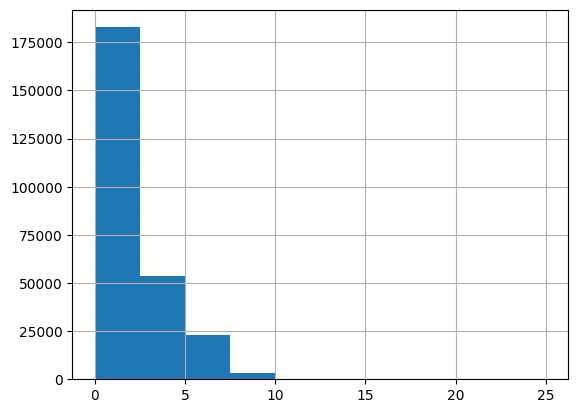

In [92]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].hist()

In [93]:
# 중앙값으로 대체 <- 0에 분포가 많이 되어있으므로 
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum())
median = df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
print(median)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(median,inplace=True)
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum())

41117
1.0
0


In [94]:
mode_1 = df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(mode_1,inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 303876, dtype: float64

In [95]:
df['ORGANIZATION_TYPE'].value_counts() #55112/303876 *100

Business Entity Type 3    67012
XNA                       55112
Self-employed             37924
Other                     16482
Medicine                  11044
Business Entity Type 2    10367
Government                10277
School                     8797
Trade: type 7              7734
Kindergarten               6809
Construction               6632
Business Entity Type 1     5901
Transport: type 4          5328
Trade: type 3              3451
Industry: type 9           3330
Industry: type 3           3234
Security                   3196
Housing                    2925
Industry: type 11          2667
Military                   2589
Bank                       2478
Agriculture                2428
Police                     2305
Transport: type 2          2174
Postal                     2135
Security Ministries        1947
Trade: type 2              1878
Restaurant                 1778
Services                   1547
University                 1311
Industry: type 7           1284
Transpor

### 머신러닝 사전준비

In [96]:
# 피처 선정 시 사용하지 않는 TARGET 컬럼 제외한 데이터프레임으로 전처리 수행
label = df["TARGET"]
df = df.drop("TARGET", axis=1)

In [97]:
# from sklearn.decomposition import PCA
# X_1= X.loc[:,'APARTMENTS_AVG':'NONLIVINGAREA_MEDI']
# pca = PCA(n_components=2)
# pca_transformed = pca.fit_transform(X_1)

# print(pca_transformed)
# df['pca_x'] = pca_transformed[:,0]
# df['pca_y'] = pca_transformed[:,1]
# df.head()

In [98]:
# marker0_ind = df[df['TARGET']==0].index
# marker1_ind = df[df['TARGET']==1].index

# plt.scatter(x=df.loc[marker0_ind, 'pca_x'], y=df.loc[marker0_ind, 'pca_y'] , marker='o')
# plt.scatter(x=df.loc[marker1_ind, 'pca_x'], y=df.loc[marker1_ind, 'pca_y'] , marker='s')


# plt.xlabel('PCA_1')
# plt.ylabel('PCA_2')
# plt.show()

In [99]:
## 이상치의 값들을 출력하는 함수 생성
## 매개변수는 2개 데이터프레임, 컬럼의 이름
def outliers_iqr(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (1.5*iqr)
    upper_whis = quartile_3 + (1.5*iqr)
    print(lower_whis, upper_whis)
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers[[col]]

In [100]:
## 이상치를 확인하는 함수를 호출
outliers = outliers_iqr(df, 'OWN_CAR_AGE')
outliers

-9.0 15.0


,OWN_CAR_AGE
2,27
6,18
13,24
15,18
66,22
...,...
307449,16
307473,19
307474,17
307491,16


In [101]:
## 이상치의 값들을 출력하는 함수 생성
## 매개변수는 2개 데이터프레임, 컬럼의 이름
def outliers_iqr_2(df, col, t):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (t*iqr)
    upper_whis = quartile_3 + (t*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]
    
    outlier_percent = str(round(len(outliers)/len(df)*100,2))

    title = f"{col} boxplot\n\n lower : {lower_whis} \n upper : {upper_whis} \n outlier_count : {len(outliers)} \n outlier percentage : {outlier_percent}%\n"

  
    return [title,df[col]]

In [102]:
df.select_dtypes(['number'])

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int
0,0,3256199,406597.5,24700.5,351000.0,0.018801,25.920548,638,9.994521,5.808219,...,3.106849,0.0,0.0,0.0,0.0,0.0,1.0,5,25,9
1,0,4341600,1293502.5,35698.5,1129500.0,0.003541,45.931507,1189,3.249315,0.797260,...,2.268493,0.0,0.0,0.0,0.0,0.0,0.0,0,45,3
2,0,1085400,135000.0,6750.0,135000.0,0.010032,52.180822,226,11.671233,6.934247,...,2.232877,0.0,0.0,0.0,0.0,0.0,0.0,6,52,11
3,0,2170800,312682.5,29686.5,297000.0,0.008019,52.068493,3040,26.939726,6.676712,...,1.690411,0.0,0.0,0.0,0.0,0.0,1.0,6,52,26
4,0,1953719,513000.0,21865.5,513000.0,0.028663,54.608219,3039,11.810959,9.473973,...,3.030137,0.0,0.0,0.0,0.0,0.0,0.0,9,54,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,2532599,254700.0,27558.0,225000.0,0.032561,25.553425,237,23.167123,5.430137,...,0.747945,0.0,0.0,0.0,0.0,0.0,1.0,5,25,23
307507,0,1157759,269550.0,12001.5,225000.0,0.025164,56.917808,0,12.021918,11.205479,...,-0.000000,0.0,0.0,0.0,0.0,0.0,1.0,11,56,12
307508,0,2460239,677664.0,29979.0,585000.0,0.005002,41.002740,7922,18.457534,14.109589,...,5.230137,1.0,0.0,0.0,1.0,0.0,1.0,14,41,18
307509,0,2749679,370107.0,20205.0,319500.0,0.005313,32.769863,4787,7.019178,2.550685,...,0.882192,0.0,0.0,0.0,0.0,0.0,0.0,2,32,7


In [103]:
# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE", "AMT_INCOME_TOTAL","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]

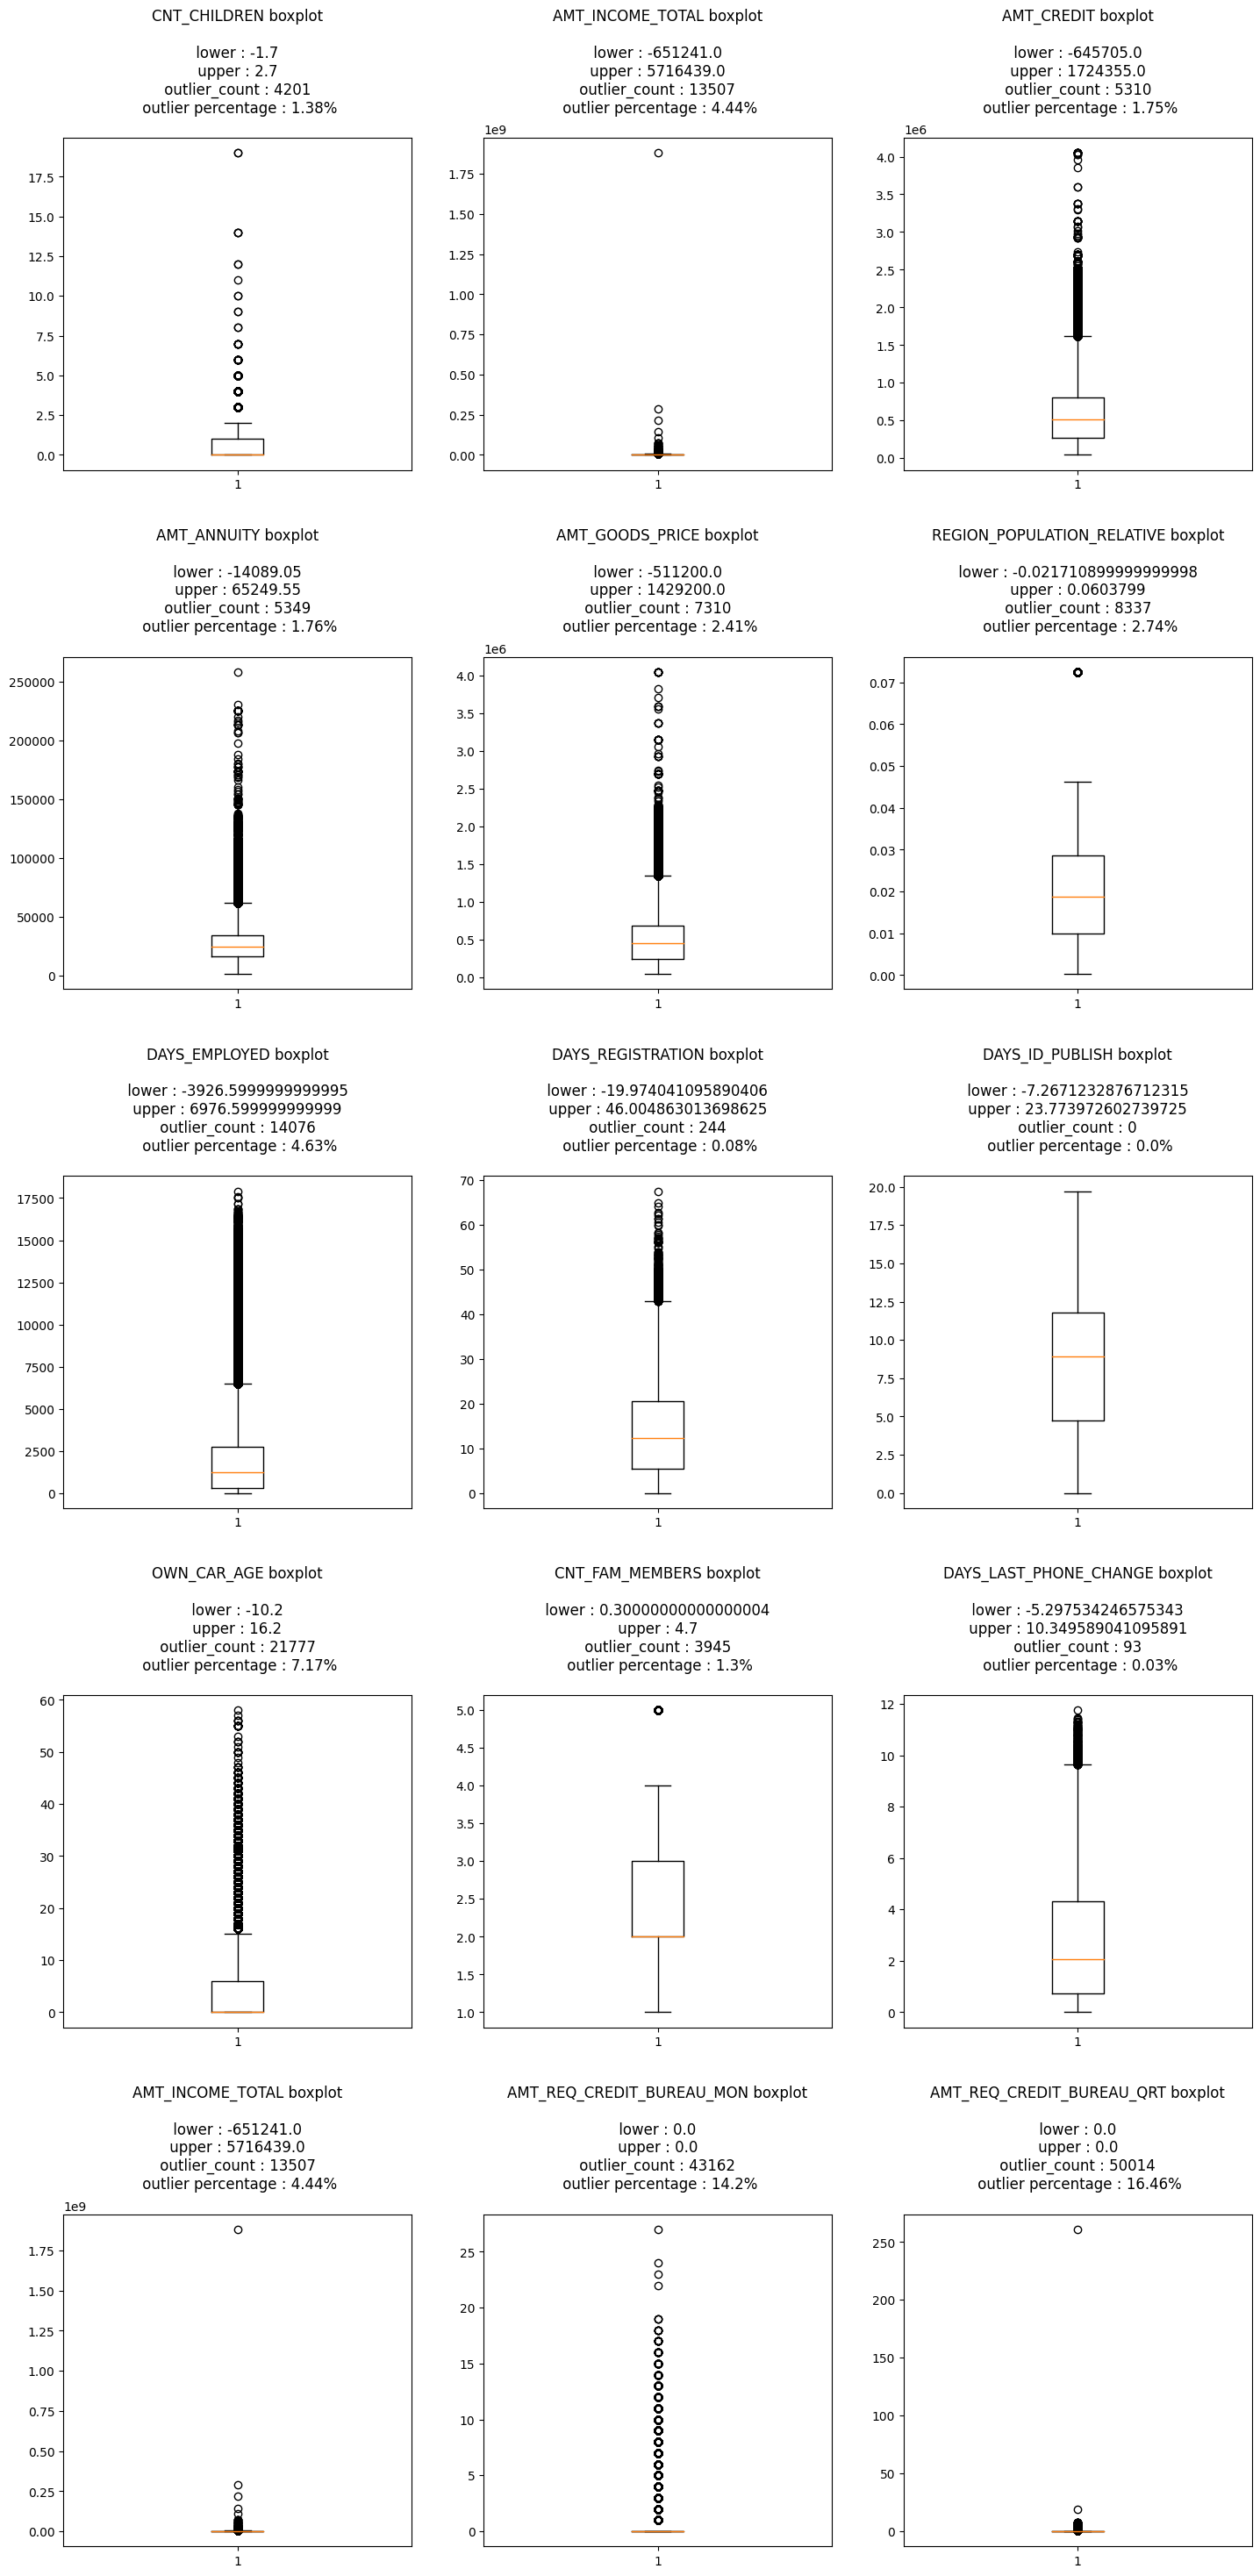

In [104]:
## 이상치를 확인하는 함수를 호출, 박스플롯 그리기

box_plot_datas = []

for col in n_encoding_column:
  data = outliers_iqr_2(df, col, 1.7)
  box_plot_datas.append(data)

plt.figure(figsize=(15,30))

for i in range(1,len(n_encoding_column)+1):
  plt.subplot(len(n_encoding_column)//3,3,i)
  plt.title(box_plot_datas[i-1][0])
  plt.boxplot(box_plot_datas[i-1][1])

plt.tight_layout(pad=3)
plt.show()

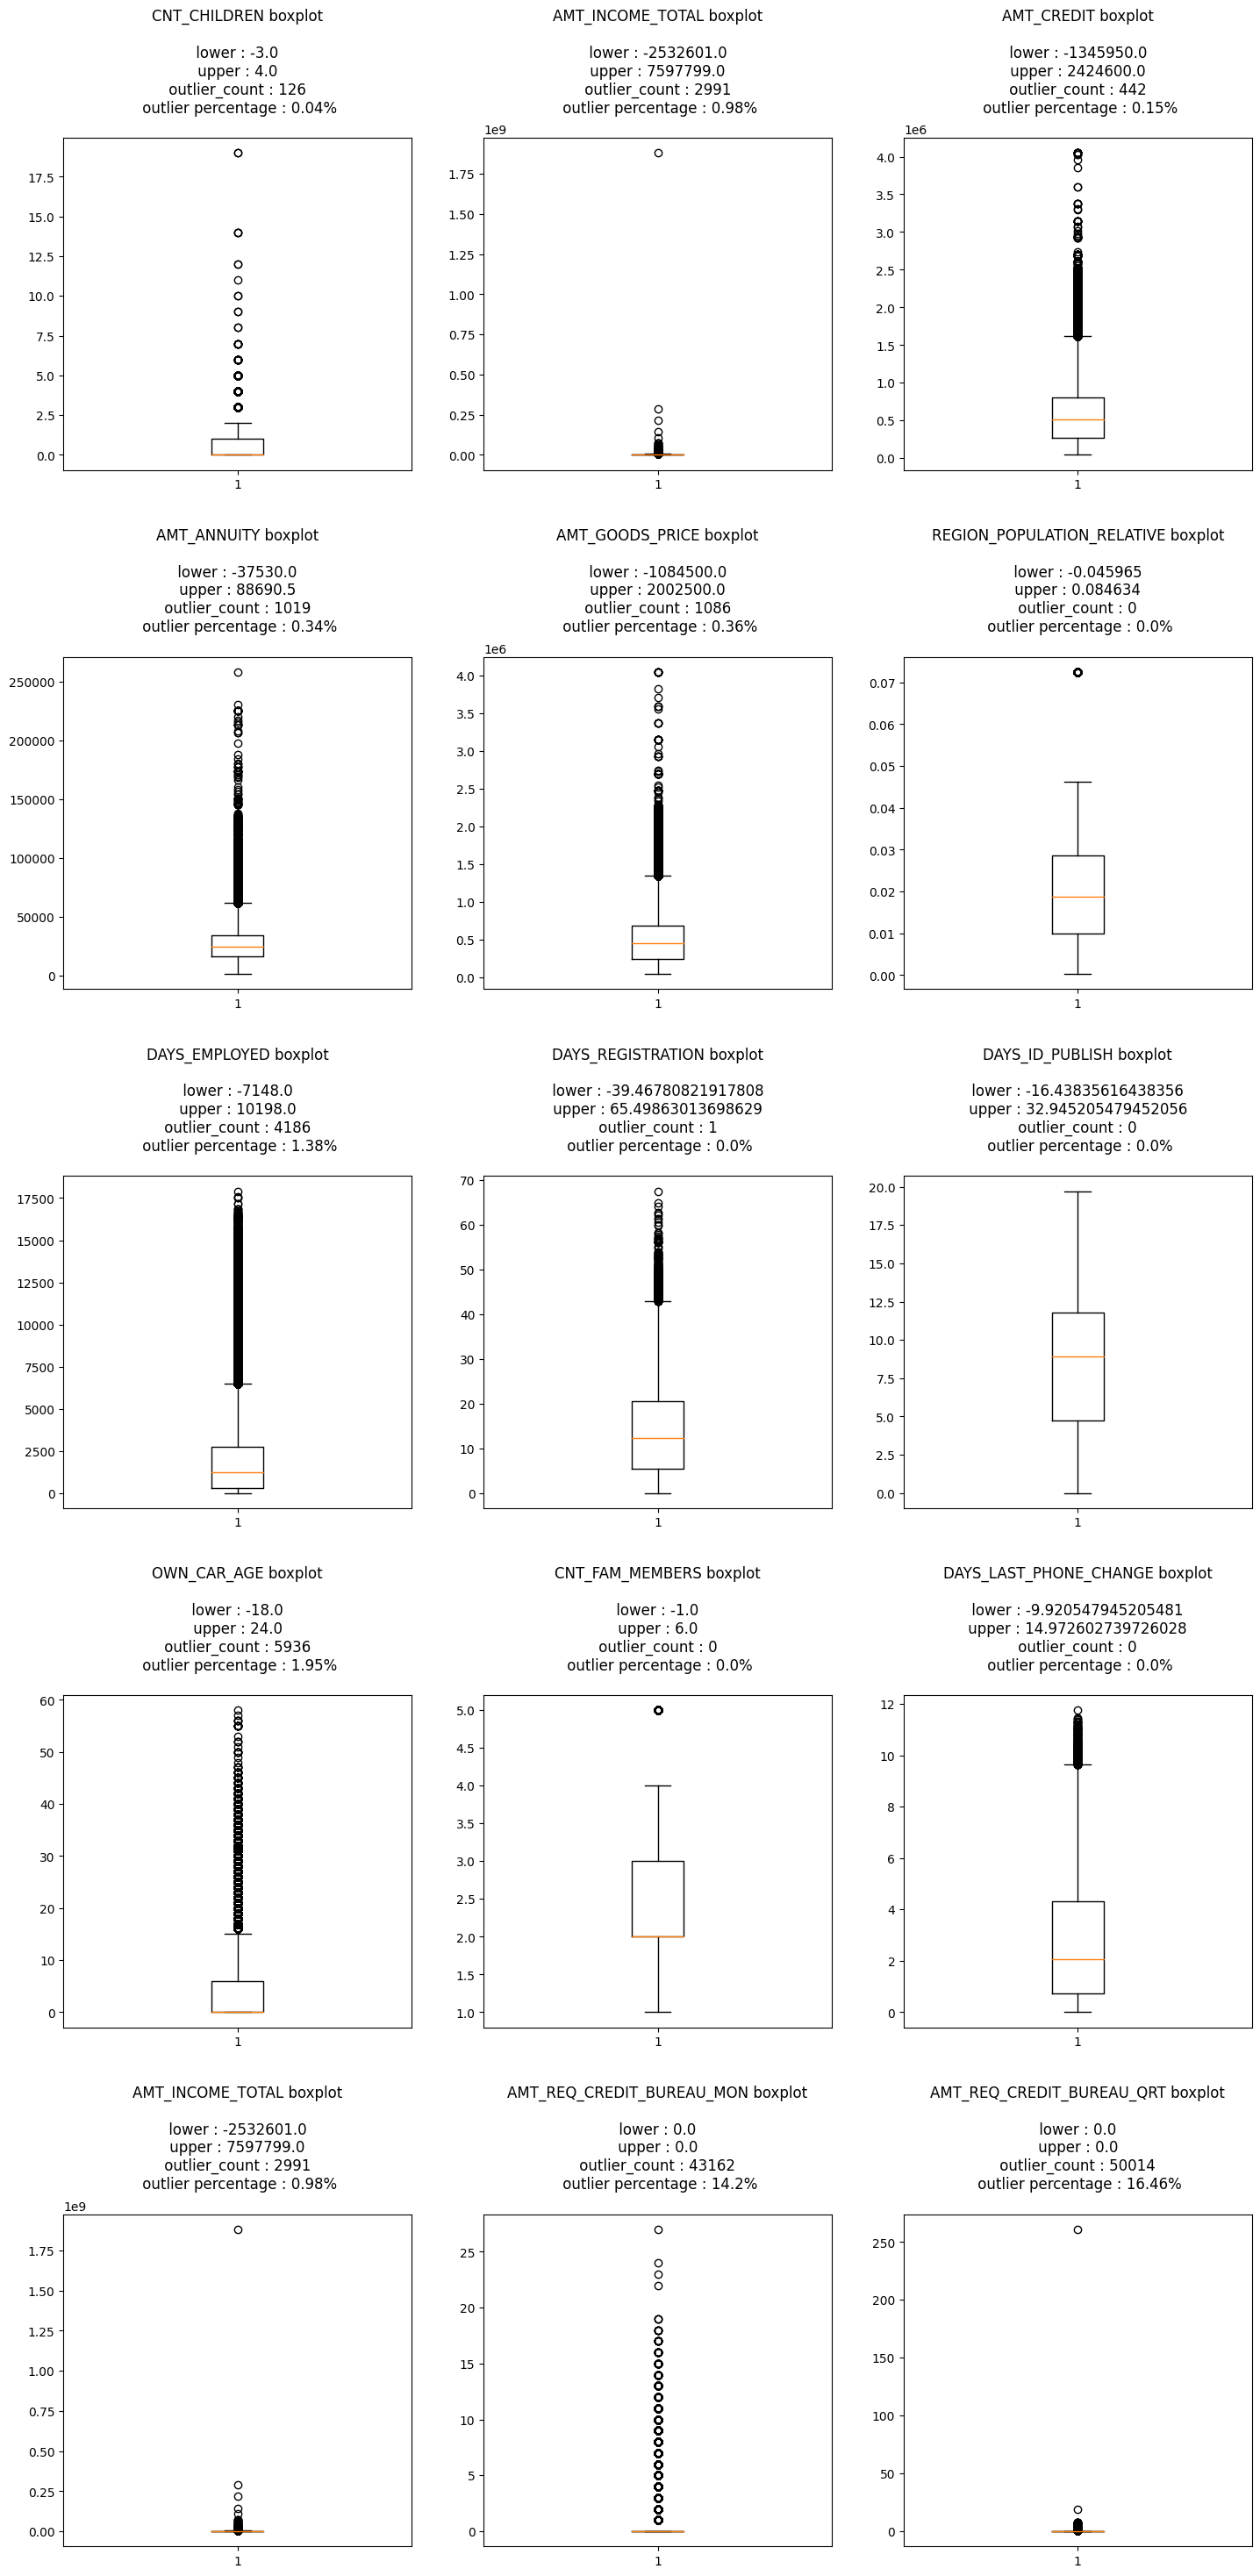

In [105]:
## 이상치를 확인하는 함수를 호출, 박스플롯 그리기

box_plot_datas = []

for col in n_encoding_column:
  data = outliers_iqr_2(df, col, 3)
  box_plot_datas.append(data)

plt.figure(figsize=(15,30))

for i in range(1,len(n_encoding_column)+1):
  plt.subplot(len(n_encoding_column)//3,3,i)
  plt.title(box_plot_datas[i-1][0])
  plt.boxplot(box_plot_datas[i-1][1])

plt.tight_layout(pad=3)
plt.show()

### 이상치 삭제 함수

In [106]:
## 이상치 삭제 함수
## 매개변수는 3개 데이터프레임, 컬럼의 이름, iqr 계수
def drop_outliers(df, col, t):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (t*iqr)
    upper_whis = quartile_3 + (t*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]

    df.drop(index=outliers.index, axis=0, inplace=True)
    
    return df

In [107]:
len(df)

303876

In [108]:
# 제거 행 수 : 8337
drop_population = drop_outliers(df,"REGION_POPULATION_RELATIVE",1.7)
drop_population

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int,DAYS_BIRTH_int_n0s,Is_Business_hours
0,Cash loans,M,N,Y,0,3256199,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,5,25,9,20s,1
1,Cash loans,F,N,N,0,4341600,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0,45,3,40s,1
2,Revolving loans,M,Y,Y,0,1085400,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,6,52,11,50s,1
3,Cash loans,F,N,Y,0,2170800,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,6,52,26,50s,0
4,Cash loans,M,N,Y,0,1953719,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,9,54,11,50s,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,2532599,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,5,25,23,20s,1
307507,Cash loans,F,N,Y,0,1157759,269550.0,12001.5,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,11,56,12,50s,1
307508,Cash loans,F,N,Y,0,2460239,677664.0,29979.0,585000.0,Unaccompanied,...,0.0,0.0,1.0,0.0,1.0,14,41,18,40s,1
307509,Cash loans,F,N,Y,0,2749679,370107.0,20205.0,319500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,2,32,7,30s,1


In [109]:
# AMT_REQ_CREDIT_BUREAU_QRT 19이상인 데이터 삭제 - 2개
df.drop(index = df.loc[df["AMT_REQ_CREDIT_BUREAU_QRT"]>=19].index, axis=0,inplace=True)
df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int,DAYS_BIRTH_int_n0s,Is_Business_hours
0,Cash loans,M,N,Y,0,3256199,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,5,25,9,20s,1
1,Cash loans,F,N,N,0,4341600,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0,45,3,40s,1
2,Revolving loans,M,Y,Y,0,1085400,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,6,52,11,50s,1
3,Cash loans,F,N,Y,0,2170800,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,6,52,26,50s,0
4,Cash loans,M,N,Y,0,1953719,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,9,54,11,50s,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,2532599,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,5,25,23,20s,1
307507,Cash loans,F,N,Y,0,1157759,269550.0,12001.5,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,11,56,12,50s,1
307508,Cash loans,F,N,Y,0,2460239,677664.0,29979.0,585000.0,Unaccompanied,...,0.0,0.0,1.0,0.0,1.0,14,41,18,40s,1
307509,Cash loans,F,N,Y,0,2749679,370107.0,20205.0,319500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,2,32,7,30s,1


### 앞서 population 지운 것으로 인해 AMT_INCOME_TOTAL 이상치 개수 감소할 수 있음
### 다시 박스플롯 그려보고 제거되는 행 수 확인

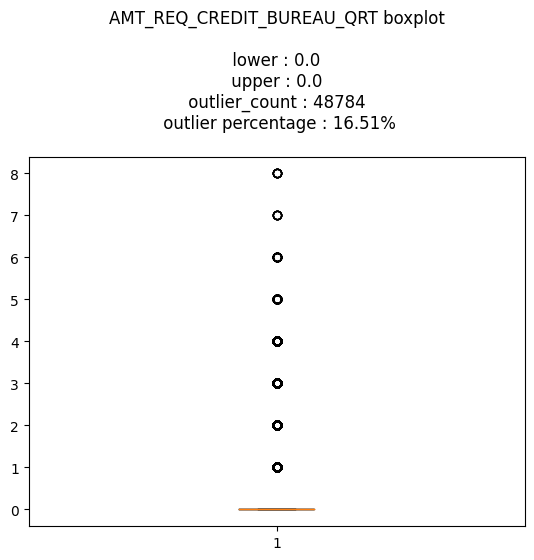

In [110]:
# 제거 행 수 2991 -> 2427 로 변화
n_encoding_column = ["AMT_INCOME_TOTAL"]

data = outliers_iqr_2(df, col, 24)

plt.title(data[0])
plt.boxplot(data[1])

plt.show()

In [111]:
# 제거 행 수 : 2991
drop_population = drop_outliers(df,"AMT_INCOME_TOTAL",3)
drop_population

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_ID_PUBLISH_int,DAYS_BIRTH_int,DAYS_REGISTRATION_int,DAYS_BIRTH_int_n0s,Is_Business_hours
0,Cash loans,M,N,Y,0,3256199,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,5,25,9,20s,1
1,Cash loans,F,N,N,0,4341600,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0,45,3,40s,1
2,Revolving loans,M,Y,Y,0,1085400,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,6,52,11,50s,1
3,Cash loans,F,N,Y,0,2170800,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,6,52,26,50s,0
4,Cash loans,M,N,Y,0,1953719,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,9,54,11,50s,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,2532599,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,5,25,23,20s,1
307507,Cash loans,F,N,Y,0,1157759,269550.0,12001.5,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,11,56,12,50s,1
307508,Cash loans,F,N,Y,0,2460239,677664.0,29979.0,585000.0,Unaccompanied,...,0.0,0.0,1.0,0.0,1.0,14,41,18,40s,1
307509,Cash loans,F,N,Y,0,2749679,370107.0,20205.0,319500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,2,32,7,30s,1


In [112]:
# DAYS_LAST_PHONE_CHANGE 피처와 AMT_INCOME_TOTAL 피처 상관관계 확인
# corr_matrix = df[['DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL']].corr()
# corr_matrix


In [113]:
df["ORGANIZATION_TYPE"].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Police',
       'Industry: type 12', 'Mobile', 'Trade: type 1', 'Industry: type 5',
       'Industry: type 10', 'Legal Services', 'Advertising', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Industry: type 8',

### 숫자로 구분되어 있는 각 컬럼 하나로 통합

#### 숫자 확인

In [114]:
len_list = []
num = 1
while True:
  len_list.append(len(df.loc[df["ORGANIZATION_TYPE"]==f"Industry: type {num}"]))
  print(f"Industry: type {num}")
  num += 1

  if num == 15:
    break

print(len_list)
print(sum(len_list))

Industry: type 1
Industry: type 2
Industry: type 3
Industry: type 4
Industry: type 5
Industry: type 6
Industry: type 7
Industry: type 8
Industry: type 9
Industry: type 10
Industry: type 11
Industry: type 12
Industry: type 13
Industry: type 14
[1005, 435, 3190, 826, 584, 104, 1262, 24, 3246, 104, 2600, 346, 65, 0]
13791


In [115]:
len_list = []
num = 1
while True:
  len_list.append(len(df.loc[df["ORGANIZATION_TYPE"]==f"Business Entity Type {num}"]))
  print(f"Business Entity Type {num}")
  num += 1

  if num == 5:
    break

print(len_list)
print(sum(len_list))

Business Entity Type 1
Business Entity Type 2
Business Entity Type 3
Business Entity Type 4
[5504, 10033, 63462, 0]
78999


In [116]:
len_list = []
num = 1
while True:
  len_list.append(len(df.loc[df["ORGANIZATION_TYPE"]==f"Trade: type {num}"]))
  print(f"Trade: type {num}")
  num += 1

  if num == 9:
    break

print(len_list)
print(sum(len_list))

Trade: type 1
Trade: type 2
Trade: type 3
Trade: type 4
Trade: type 5
Trade: type 6
Trade: type 7
Trade: type 8
[326, 1744, 3331, 57, 47, 591, 7544, 0]
13640


In [117]:
len_list = []
num = 1
while True:
  len_list.append(len(df.loc[df["ORGANIZATION_TYPE"]==f"Transport: type {num}"]))
  print(f"Transport: type {num}")
  num += 1

  if num == 6:
    break

print(len_list)
print(sum(len_list))

Transport: type 1
Transport: type 2
Transport: type 3
Transport: type 4
Transport: type 5
[192, 2151, 1149, 5105, 0]
8597


#### 통합 & 통합 후 숫자 확인

In [118]:
num = 1

while True:
  df.loc[df["ORGANIZATION_TYPE"]==f"Industry: type {num}","ORGANIZATION_TYPE"]="Industry: type"
  num += 1

  if num == 15:
    break

In [119]:
len(df.loc[df["ORGANIZATION_TYPE"]=="Industry: type"])

13791

In [120]:
num = 1

while True:
  df.loc[df["ORGANIZATION_TYPE"]==f"Business Entity Type {num}","ORGANIZATION_TYPE"]="Business Entity Type"
  num += 1

  if num == 5:
    break

In [121]:
len(df.loc[df["ORGANIZATION_TYPE"]=="Business Entity Type"])

78999

In [122]:
num = 1

while True:
  df.loc[df["ORGANIZATION_TYPE"]==f"Trade: type {num}","ORGANIZATION_TYPE"]="Trade: type"
  num += 1

  if num == 9:
    break

In [123]:
len(df.loc[df["ORGANIZATION_TYPE"]=="Trade: type"])

13640

In [124]:
num = 1

while True:
  df.loc[df["ORGANIZATION_TYPE"]==f"Transport: type {num}","ORGANIZATION_TYPE"]="Transport: type"
  num += 1

  if num == 6:
    break

In [125]:
len(df.loc[df["ORGANIZATION_TYPE"]=="Transport: type"])


8597

In [128]:
# 인코딩 안해도 되는 컬럼들 - AMT_INCOME_TOTAL 제외
n_encoding_column= ["CNT_CHILDREN","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE", "AMT_INCOME_TOTAL","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]

In [127]:
len(n_encoding_column)

15

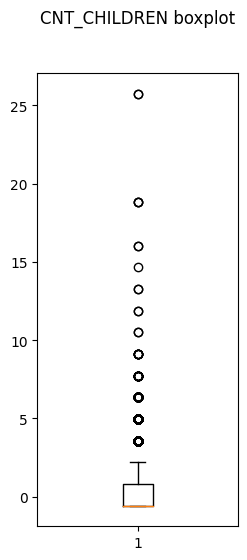

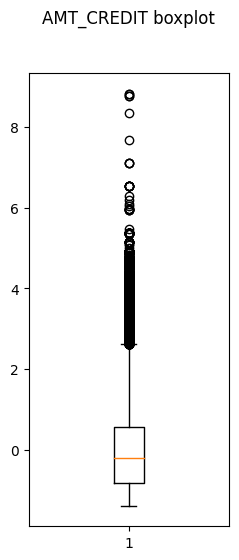

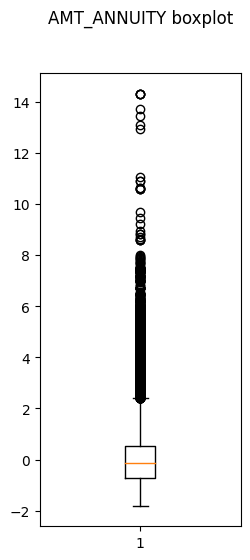

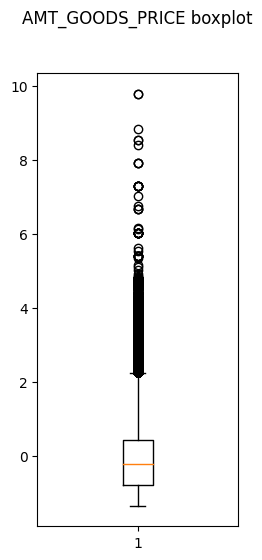

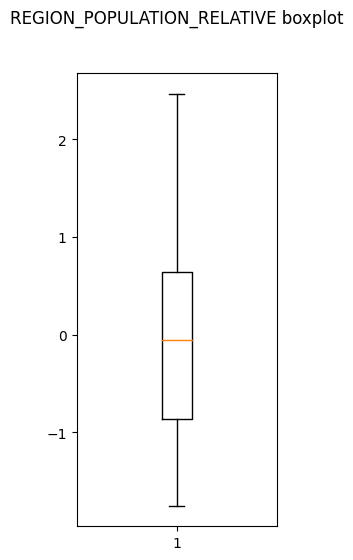

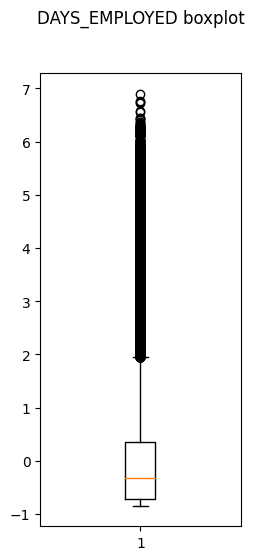

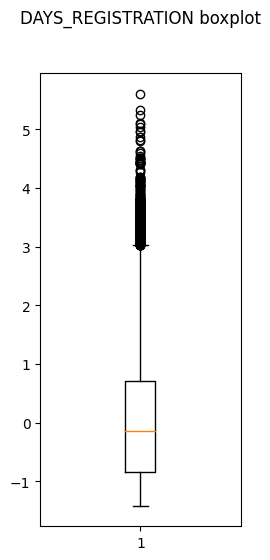

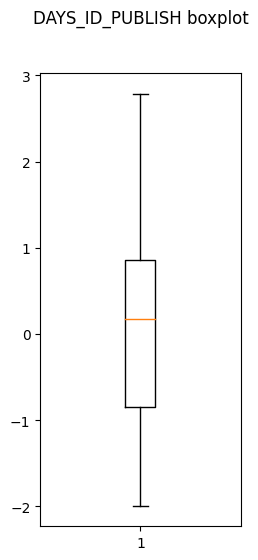

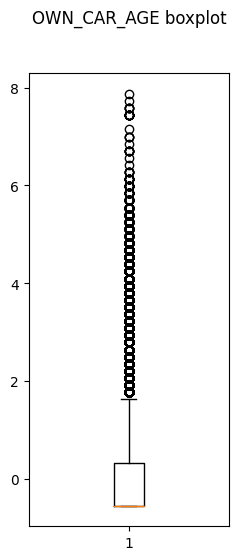

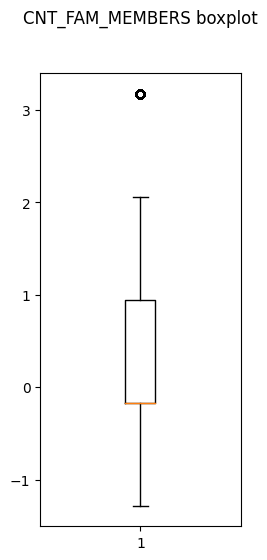

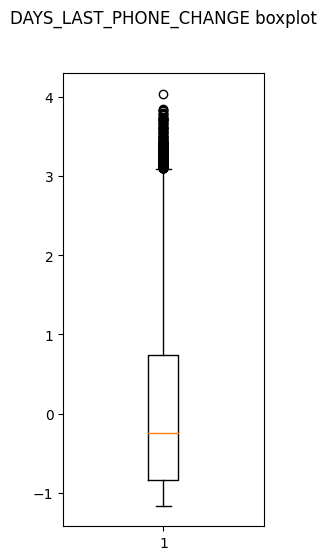

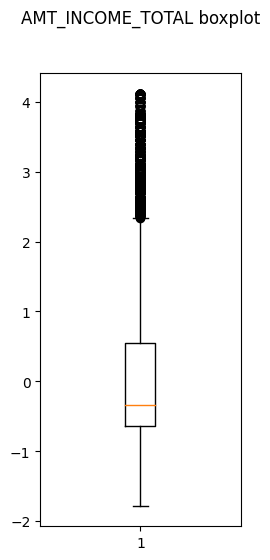

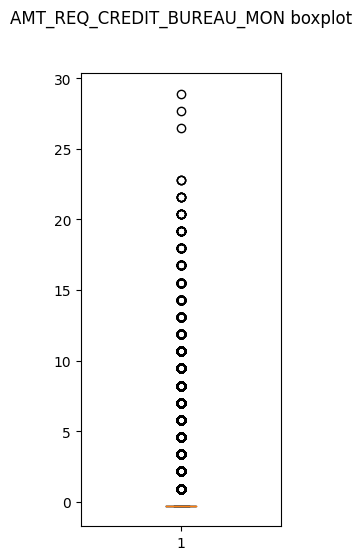

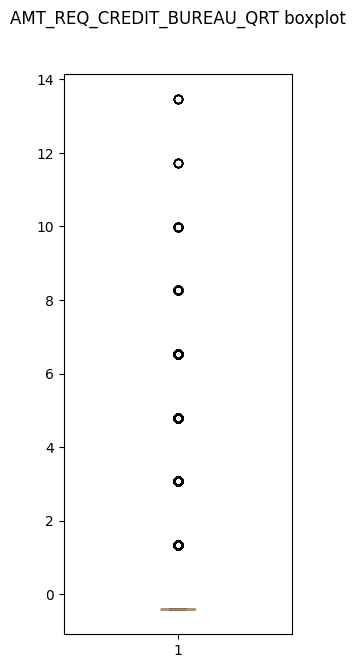

In [136]:
# income빼고 1.7로 이상치 다시 그려서 확인
from sklearn.preprocessing import StandardScaler

for col in n_encoding_column:
  n = n_encoding_column.index(col) + 1
  scaled_data = StandardScaler().fit_transform(df[col].array.reshape(-1,1))

  plt.figure(figsize=(15,20))

  plt.subplot(3,5,n)

  plt.title(f"{col} boxplot\n\n")
  plt.boxplot(scaled_data)

  
plt.tight_layout(pad=3)
plt.show()


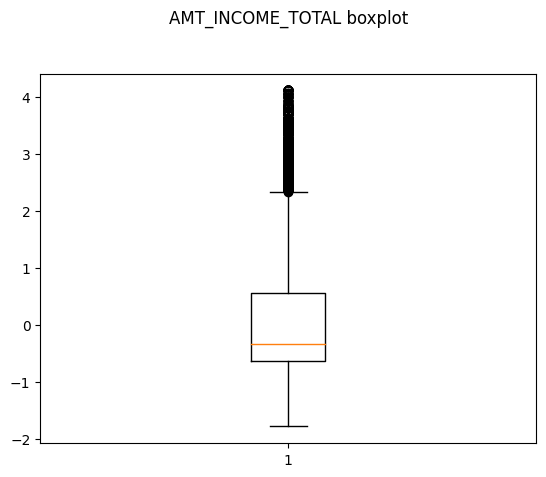

In [142]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df["AMT_INCOME_TOTAL"].array.reshape(-1,1))

plt.title("AMT_INCOME_TOTAL boxplot\n\n")
plt.boxplot(scaled_data)

plt.show()

### label encoding

In [130]:
label = df['NAME_EDUCATION_TYPE']


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(label)

label_encoded = le.transform(label)
label_encoded_1 = pd.Series(label_encoded +1)

label_encoded_1.value_counts()

5    206301
2     67848
3      9383
4      3664
1       143
dtype: int64

In [131]:
# df["EDUCATION_GRADE"]=label_encoded_1

In [ ]:
# df.loc[df["EDUCATION_GRADE"].isna()==True][["NAME_EDUCATION_TYPE","EDUCATION_GRADE"]]

In [ ]:
df_copy = df.copy()

In [ ]:
# df["EDUCATION_GRADE"]=label_encoded_1
df_copy["EDUCATION_GRADE"]=label_encoded_1

In [ ]:
df_copy.loc[df_copy["EDUCATION_GRADE"].isna()==True][["NAME_EDUCATION_TYPE","EDUCATION_GRADE"]].index

In [ ]:
df.iloc[287339:,]

In [ ]:
label = df['NAME_EDUCATION_TYPE']


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(label)

label_encoded = le.transform(label)
label_encoded_1 = pd.Series(label_encoded +1)

label_encoded_1.value_counts()

df_copy = df.copy()

df_copy["EDUCATION_GRADE"]=label_encoded_1

df_copy.loc[df_copy["EDUCATION_GRADE"].isna()==True][["NAME_EDUCATION_TYPE","EDUCATION_GRADE"]].index

df.iloc[287339:,]